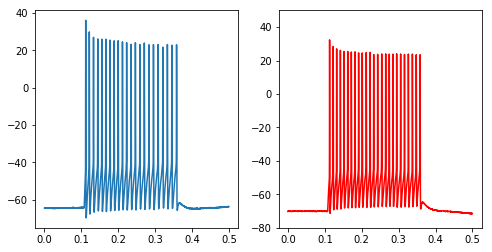

In [483]:
import matplotlib.pyplot as plt
import matplotlib
import pyabf
import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
filepath = '/Volumes/brain_slice/Tsai/04-18-19_PV-cre-tdTOM-GCaM6f_P55/t041819a_PV_0000.abf'
abfCtrl = pyabf.ABF(filepath)

filepath = '/Volumes/brain_slice/Tsai/04-18-19_PV-cre-tdTOM-GCaM6f_P55/t041819a_PV_0005.abf'
abfDrug = pyabf.ABF(filepath)

abfCtrl.setSweep(5)
abfDrug.setSweep(5)

f, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(abfCtrl.sweepX, abfCtrl.sweepY)
ax[1].plot(abfDrug.sweepX, abfDrug.sweepY, color = 'red')

plt.ylim((-80,50))
plt.show()

#/Volumes/brain_slice/Tsai/03-27-19_PV-cre-tdTOM-Cheata_P75/t032719d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-15-19_PV-cre-tdTOM-GCaM6f_P52/t041519d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-17-19_PV-cre-tdTOM-GCaM6f_P54/t041719d_PV_0001.abf
#/Volumes/brain_slice/Tsai/04-18-19_PV-cre-tdTOM-GCaM6f_P55/t041819d_PV_0001.abf

In [484]:
Ctrl = []
Drug = []
for sweep in abfCtrl.sweepList:
    abfCtrl.setSweep(sweep,channel=0)
    Ctrl.append(abfCtrl.sweepY)
Ctrl = np.stack(Ctrl)
TimeCtrl = abfCtrl.sweepX

for sweep in abfDrug.sweepList:
    abfDrug.setSweep(sweep,channel=0)
    Drug.append(abfDrug.sweepY)
Drug = np.stack(Drug)
TimeDrug = abfDrug.sweepX

In [485]:
#find spike method 2 -> better
SpikesCtrl = []
SpikesDrug = []

for sweep in abfCtrl.sweepList:
    abfCtrl.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abfCtrl.sweepY, height=-20)
    SpikesCtrl.append(peak_time)    
    

for sweep in abfDrug.sweepList:
    abfDrug.setSweep(sweep,channel=0)
    peak_time, _ = find_peaks(abfDrug.sweepY, height=-20)
    SpikesDrug.append(peak_time)
       

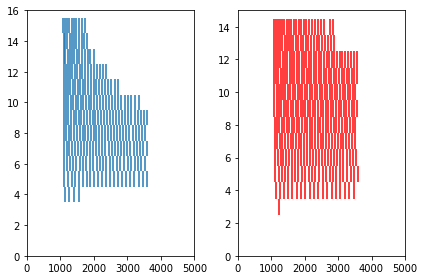

In [486]:
# rastor plot
plt.subplot(1,2,1)
plt.eventplot(SpikesCtrl)
plt.ylim((0,len(abfCtrl.sweepList)))
plt.xlim((0,5000))


plt.subplot(1,2,2)
plt.eventplot(SpikesDrug, color ='red')
plt.ylim((0,len(abfDrug.sweepList)))
plt.xlim((0,5000))



plt.tight_layout()

Text(0.5, 0, 'Time (sec)')

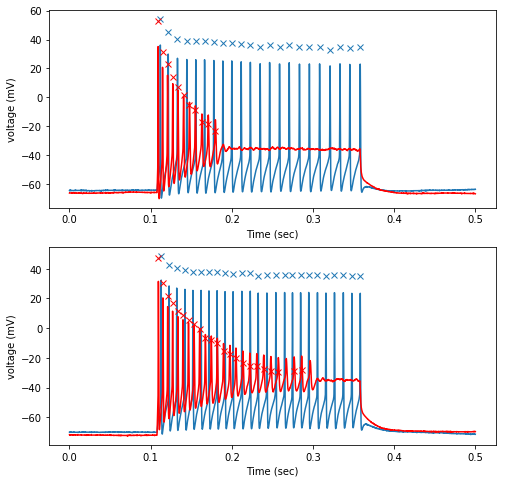

In [487]:
sweep1 =5
sweep2 =14

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(TimeCtrl,Ctrl[sweep1])
plt.plot(SpikesCtrl[sweep1]/10000, Ctrl[sweep1,SpikesCtrl[sweep1]]*1.5, "x", color ='#1f77b4')
plt.plot(TimeCtrl,Ctrl[sweep2], 'red')
plt.plot(SpikesCtrl[sweep2]/10000, Ctrl[sweep2,SpikesCtrl[sweep2]]*1.5, "x", color ='red')
plt.ylabel("voltage (mV)")
plt.xlabel("Time (sec)")

plt.subplot(2,1,2)
plt.plot(TimeDrug,Drug[sweep1])
plt.plot(SpikesDrug[sweep1]/10000, Drug[sweep1,SpikesDrug[sweep1]]*1.5, "x", color ='#1f77b4')
plt.plot(TimeDrug,Drug[sweep2], 'red')
plt.plot(SpikesDrug[sweep2]/10000, Drug[sweep2,SpikesDrug[sweep2]]*1.5, "x", color ='red')

plt.ylabel("voltage (mV)")
plt.xlabel("Time (sec)")



#plt.tight_layout()



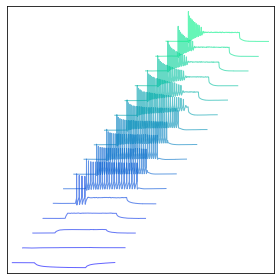

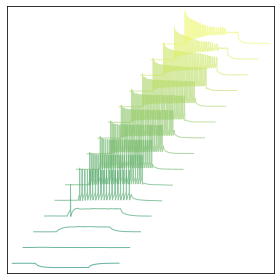

In [488]:
# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abfCtrl.sweepCount) for x in abfCtrl.sweepList]

plt.figure(figsize=(4,4))
#plt.subplot(1,2,1)
for sweepNumber in abfCtrl.sweepList:
    plt.plot(
        x + .05 * sweepNumber,
        Ctrl[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)



# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

#plt.show()


# use a custom colormap
cm = plt.get_cmap("summer")
colors = [cm(x/abfDrug.sweepCount) for x in abfDrug.sweepList]
plt.figure(figsize=(4,4))
#plt.subplot(1,2,2)
for sweepNumber in abfDrug.sweepList:

    plt.plot(
        x + .05 * sweepNumber,
        Drug[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)



# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

#plt.show()

In [489]:
# allocate numbers of spikes in each sweep
SpikeNumberCtrl = []
SpikeNumberDrug = []

for i in abfCtrl.sweepList:
    spkn = len(SpikesCtrl[i])
    SpikeNumberCtrl.append(spkn*4) # 4 is the number to convert spike number to rate (# of spikes/250ms current injection) 

for i in abfDrug.sweepList:
    spkn = len(SpikesDrug[i])
    SpikeNumberDrug.append(spkn*4)


Text(0, 0.5, 'firing rate (Hz)')

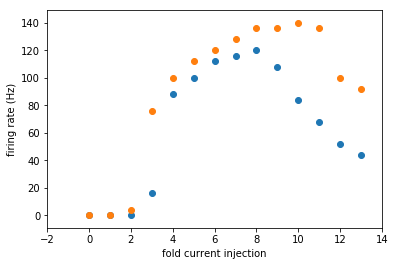

In [490]:
#input-output plot
injection = np.linspace(-1, 13, 15)
plt.scatter(injection[1:15],SpikeNumberCtrl[1:15])
plt.scatter(injection[1:15],SpikeNumberDrug[1:15])

plt.xlim(-2,14)
plt.xlabel('fold current injection')
plt.ylabel('firing rate (Hz)') 